 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [109]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [110]:
# Reading whale returns
whale_returns_data = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [111]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [112]:
# Drop nulls
whale_returns.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [113]:
# Reading algorithmic returns
algorithmic_returns_data = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algorithmic_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns = algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [114]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [115]:
# Drop nulls
algo_returns.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [116]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_data = Path("Resources/sp_tsx_history.csv")
sp_tsx = pd.read_csv(sp_tsx_data, index_col= "Date", infer_datetime_format=True, parse_dates=True)
sp_tsx = sp_tsx.sort_index()
sp_tsx.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [117]:
# Check Data Types
sp_tsx.dtypes

Close    object
dtype: object

In [118]:
# Fix Data Types
sp_tsx["Close"] = sp_tsx["Close"].str.replace(',', '').str.replace('$','')
sp_tsx["Close"] = sp_tsx["Close"].astype(str).astype(float)

In [119]:
# Calculate Daily Returns
daily_returns = sp_tsx.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [120]:
# Drop nulls
daily_returns.isnull().sum()
daily_returns.dropna(inplace=True)

In [121]:
#Change name of Close for this portfolio
daily_returns = daily_returns.rename(columns={"Close":"S&P TSX"})
daily_returns.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [126]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data = pd.concat([whale_returns, algo_returns, daily_returns], axis="columns", join="inner")
joined_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

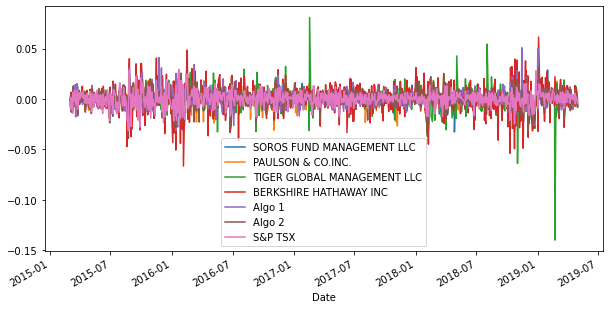

In [129]:
# Plot daily returns of all portfolios
joined_data.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

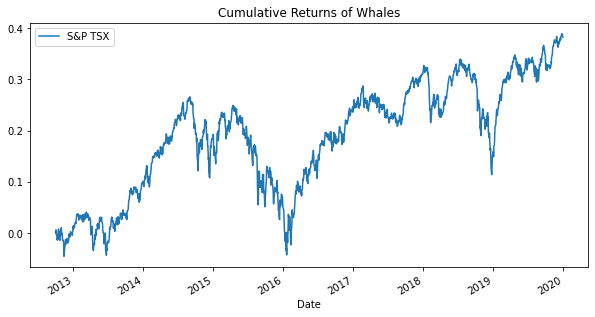

In [128]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of Whales")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


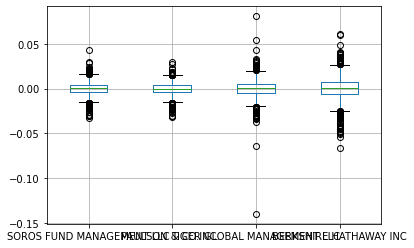

In [131]:
# Box plot to visually show risk
##Whale Returns boxplot
whale_returns.boxplot()

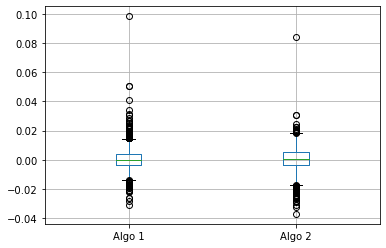

In [132]:
#Algo Returns Boxplot
algo_returns.boxplot()

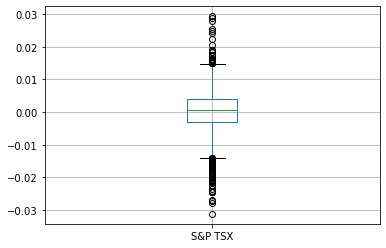

In [133]:
#Daily Returns Boxplot
daily_returns.boxplot()

### Calculate Standard Deviations

In [137]:
# Calculate the daily standard deviations of all portfolios
std_dev_all = joined_data.std()
print(std_dev_all)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [140]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_std_dev = daily_returns.std()
print(sp_std_dev)
# Determine which portfolios are riskier than the S&P TSX 60
## Riskier where X > 0.006637
print("Soross, Paulson, Tiger, Berkshire, Algo 1 and Algo 2")

S&P TSX    0.006637
dtype: float64
Soross, Paulson, Tiger, Berkshire, Algo 1 and Algo 2


### Calculate the Annualized Standard Deviation

In [143]:
# Calculate the annualized standard deviation (252 trading days)
annual_std_dev = joined_data.std() * np.sqrt(252)
print(annual_std_dev)

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

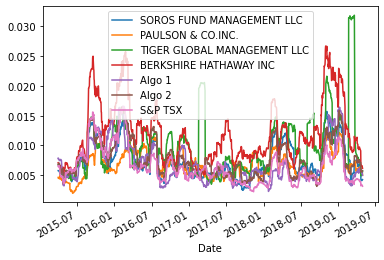

In [150]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = joined_data.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std = joined_data.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [154]:
# Calculate the correlation
correlation = joined_data.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


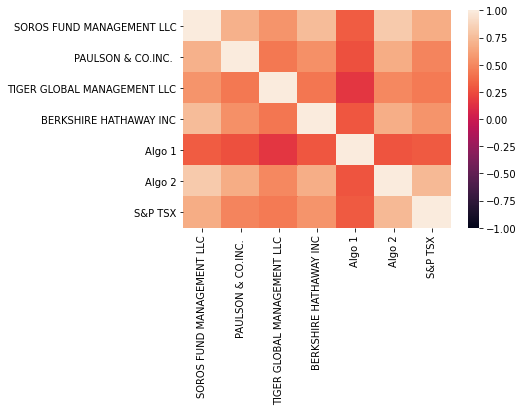

In [155]:
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [174]:
# Calculate covariance of a single portfolio
rolling_covariance = whale_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov()
rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000096
2019-04-26    0.000086
2019-04-29    0.000084
2019-04-30    0.000085
2019-05-01    0.000084
Name: BERKSHIRE HATHAWAY INC, Length: 1059, dtype: float64

In [175]:
# Calculate variance of S&P TSX
rolling_variance = daily_returns["S&P TSX"].rolling(window=60).var()
rolling_variance

Date
2012-10-02         NaN
2012-10-03         NaN
2012-10-04         NaN
2012-10-05         NaN
2012-10-09         NaN
                ...   
2019-12-20    0.000014
2019-12-23    0.000013
2019-12-24    0.000013
2019-12-27    0.000010
2019-12-30    0.000009
Name: S&P TSX, Length: 1817, dtype: float64

In [176]:
# Computing beta
bh_beta = rolling_covariance/rolling_variance
bh_beta

Date
2012-10-02   NaN
2012-10-03   NaN
2012-10-04   NaN
2012-10-05   NaN
2012-10-09   NaN
              ..
2019-12-20   NaN
2019-12-23   NaN
2019-12-24   NaN
2019-12-27   NaN
2019-12-30   NaN
Length: 1841, dtype: float64

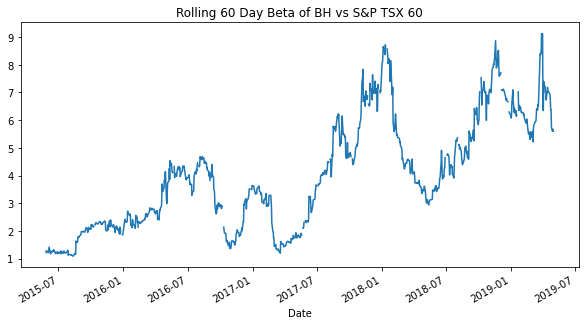

In [177]:
# Plot beta trend
bh_beta.plot(figsize=(10,5), title='Rolling 60 Day Beta of BH vs S&P TSX 60')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [178]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_data.mean() * 252) / (std_dev_all * np.sqrt(252))
sharpe_ratios.head()

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
dtype: float64

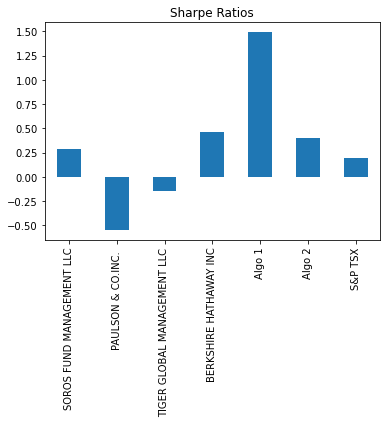

In [179]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [202]:
# Reading data from 1st stock
shop_data = Path("Resources/shop_historical.csv")
shop_data = pd.read_csv(shop_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_data = shop_data.sort_index()
shop_data.pop("Symbol")
shop_data = shop_data.rename(columns = {"Close": "SHOP Close"})
shop_data.head()

,SHOP Close
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [203]:
# Reading data from 2nd stock
otex_data = Path("Resources/otex_historical.csv")
otex_data = pd.read_csv(otex_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_data = otex_data.sort_index()
otex_data.pop("Symbol")
otex_data = otex_data.rename(columns = {"Close": "OTEX Close"})
otex_data.head()

,OTEX Close
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [204]:
# Reading data from 3rd stock
l_data = Path("Resources/l_historical.csv")
l_data = pd.read_csv(l_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
l_data = l_data.sort_index()
l_data.pop("Symbol")
l_data = l_data.rename(columns = {"Close": "L Close"})
l_data.head()

,L Close
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [205]:
# Combine all stocks in a single DataFrame
joined_data = pd.concat([shop_data, otex_data, l_data], axis="columns", join="inner")
joined_data

,SHOP Close,OTEX Close,L Close
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [206]:
# Reset Date index
joined_data = joined_data.sort_index()

In [ ]:
# Reorganize portfolio data by having a column per symbol
#done above

In [207]:
# Calculate daily returns
daily_returns = joined_data.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.sample()

,SHOP Close,OTEX Close,L Close
Date,,,
2019-10-18,-0.053811,-0.038569,-0.003916


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [209]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [214]:
# Join your returns DataFrame to the original returns DataFrame
total_returns = pd.concat([joined_data, portfolio_returns], axis="columns", join="inner")
total_returns = total_returns.rename(columns = {"0": "Portfolio Returns"})
total_returns

,SHOP Close,OTEX Close,L Close,0
Date,,,,
2018-01-03,135.15,43.07,57.41,0.000565
2018-01-04,137.46,42.91,57.42,0.004517
2018-01-05,137.26,42.57,57.42,-0.003126
2018-01-08,139.51,42.16,56.86,-0.000997
2018-01-09,137.94,42.13,57.37,-0.000999
...,...,...,...,...
2019-12-20,513.22,58.68,67.90,0.007495
2019-12-23,511.62,57.89,67.68,-0.006607
2019-12-24,525.39,57.44,67.67,0.006331


In [216]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_returns.dropna
total_returns

,SHOP Close,OTEX Close,L Close,0
Date,,,,
2018-01-03,135.15,43.07,57.41,0.000565
2018-01-04,137.46,42.91,57.42,0.004517
2018-01-05,137.26,42.57,57.42,-0.003126
2018-01-08,139.51,42.16,56.86,-0.000997
2018-01-09,137.94,42.13,57.37,-0.000999
...,...,...,...,...
2019-12-20,513.22,58.68,67.90,0.007495
2019-12-23,511.62,57.89,67.68,-0.006607
2019-12-24,525.39,57.44,67.67,0.006331


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [217]:
# Calculate the annualized `std`
annual_std_dev = portfolio_returns.std() * np.sqrt(252)
print(annual_std_dev)

0.21679368071345856


### Calculate and plot rolling `std` with 21-day window

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2019-12-20    0.009185
2019-12-23    0.009339
2019-12-24    0.009177
2019-12-27    0.007864
2019-12-30    0.008712
Length: 500, dtype: float64


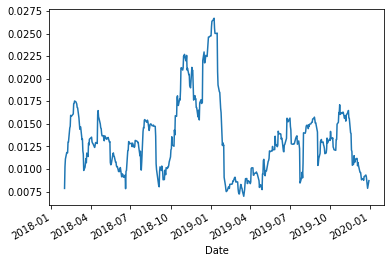

In [219]:
# Calculate rolling standard deviation
rolling_std = portfolio_returns.rolling(window=21).std()
print(rolling_std)
# Plot the rolling standard deviation
rolling_std = portfolio_returns.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [222]:
# Calculate the correlation
correlation_port = total_returns.corr()
correlation_port

,SHOP Close,OTEX Close,L Close,0
SHOP Close,1.000000,0.864208,0.894886,0.029475
OTEX Close,0.864208,1.000000,0.800485,0.047398
L Close,0.894886,0.800485,1.000000,0.035447
0,0.029475,0.047398,0.035447,1.000000


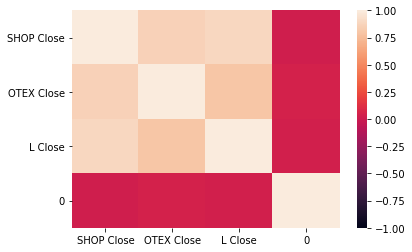

In [223]:
#Plot the correlation
import seaborn as sns
sns.heatmap(correlation_port, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

Date
2012-10-02          NaN
2012-10-03          NaN
2012-10-04          NaN
2012-10-05          NaN
2012-10-09          NaN
                ...    
2019-12-20    11.088176
2019-12-23    11.410152
2019-12-24    11.323704
2019-12-27    14.524386
2019-12-30    16.515534
Length: 1817, dtype: float64


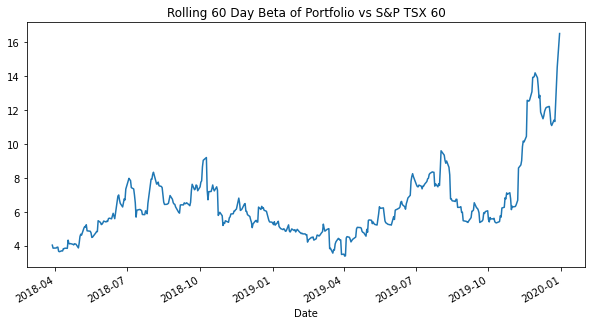

In [227]:
# Calculate and plot Beta
port_rolling_covariance = portfolio_returns.rolling(window=60).cov()
port_rolling_covariance

beta_port = port_rolling_covariance / rolling_variance
print(beta_port)
beta_port.plot(figsize=(10,5), title='Rolling 60 Day Beta of Portfolio vs S&P TSX 60')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [234]:
# Calculate Annualzied Sharpe Ratios
std_dev_total = total_returns.std()

port_sharpe_ratios = (total_returns.mean() * 252) / (std_dev_total * np.sqrt(252))
port_sharpe_ratios.head()

SHOP Close     37.498016
OTEX Close    172.357848
L Close       153.076713
0               1.623501
dtype: float64

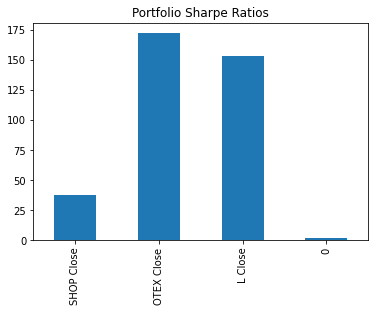

In [235]:
# Visualize the sharpe ratios as a bar plot
port_sharpe_ratios.plot.bar(title="Portfolio Sharpe Ratios")

### How does your portfolio do?

Write your answer here!